<a href="https://colab.research.google.com/github/arac22/keras-demo/blob/main/regression_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/keras/regression

## Import Python modules

In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


##Load Data

In [5]:
# load excel file
raw_dataset = pd.read_excel('coseno.xlsx')

In [ ]:
# copy only relevant columns
dataset = raw_dataset[['x1','x2','y1','y2']].copy()
dataset.tail()

In [ ]:
# check for NaN in the dataset
dataset.isna().sum()

In [9]:
# split dataset in train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

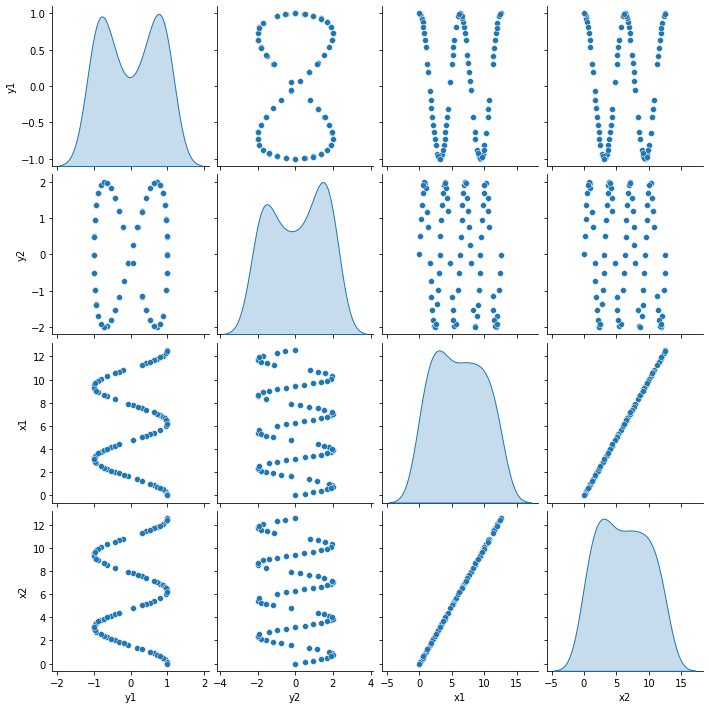

In [11]:
# plot partial distributions of training data
sns.pairplot(train_dataset[['y1', 'y2', 'x1', 'x2']], diag_kind='kde')

In [57]:
# extract features and labels into separate arrays
train_features = train_dataset.loc[:, ['x1','x2']]
test_features = test_dataset.loc[:, ['x1','x2']]

train_labels = train_dataset.loc[:, ['y1','y2']]
test_labels = test_dataset.loc[:, ['y1','y2']]

##Normalization

In [58]:
# show train_dataset mean and std
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,81.0,6.062914,3.750375,0.000000,2.888800,6.154400,9.294400,12.560000
x2,81.0,6.062914,3.750375,0.000000,2.888800,6.154400,9.294400,12.560000
y1,81.0,0.004162,0.747576,-0.999999,-0.730319,0.060374,0.731406,1.000000
y2,81.0,0.082675,1.424911,-1.997414,-1.373176,0.000000,1.368537,1.995957


In [59]:
# create a Normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)

In [60]:
# set mean and std for Normalization layer
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[6.063 6.063]]


## Utility functions

In [62]:
def plot_loss(history, ymax=100):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, ymax])
  plt.xlabel('Epoch')
  plt.ylabel('Error [y]')
  plt.legend()
  plt.grid(True)

# Regression with a deep neural network (DNN)

The model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

## Regression using a DNN and multiple inputs


In [ ]:
# create keras model
output_dimension = 2

dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(output_dimension)
  ])

dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


dnn_model.summary()

In [ ]:
dnn_model.get_weights()

In [125]:
# train keras model

callbacks = [
    keras.callbacks.TensorBoard(log_dir='./logs')
]
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=500,
    callbacks=callbacks)

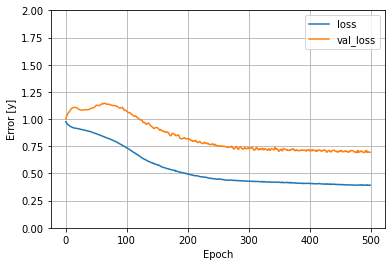

In [126]:
plot_loss(history,2)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

## Evaluate model with test_data

In [121]:
# evaluate model loss with test_data 
test_results = {}
test_results = dnn_model.evaluate(test_features, test_labels, verbose=0)

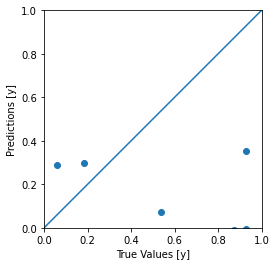

In [123]:
test_predictions = dnn_model.predict(test_features)

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [y]')
plt.ylabel('Predictions [y]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

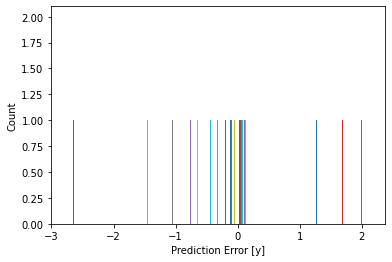

In [84]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [y]')
_ = plt.ylabel('Count')

## Save and Load model

In [21]:
dnn_model.save('dnn_model')

If you reload the model, it gives identical output:

In [22]:
reloaded = tf.keras.models.load_model('dnn_model')

## Make a single prediction

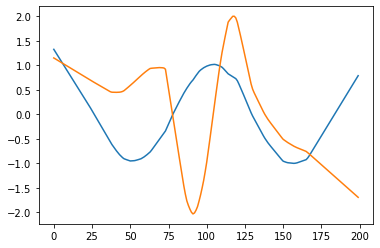

In [127]:
from numpy.core.function_base import linspace

r = linspace(0,12,200)
d = {'x1': r, 'x2': r}
single_feature = pd.DataFrame(data=d)

single_prediction = dnn_model.predict(single_feature)
single_prediction
plt.plot(single_prediction)


In [ ]:
#%reset_selective train_features
#%reset_selective test_features
#%reset_selective train_labels
#%reset_selective test_labels